**Author**: Vignesh Tallam


# K Nearest Neighbors Project

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and revise the concept
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [ ]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [ ]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

In [ ]:
sns.pairplot(data=df,hue='TARGET CLASS',diag_kind='hist')

Output hidden; open in https://colab.research.google.com to view.

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [ ]:

X=df.drop('TARGET CLASS',axis = 1) #last colum is the ouput
y=df['TARGET CLASS']


In [ ]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [ ]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [ ]:
scaler.fit(X_train)

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
scaled_df=pd.DataFrame(X_train)
scaled_df

,0,1,2,3,4,5,6,7,8,9
0,-2.740343,-2.614186,-2.462695,-3.306835,-2.702538,-3.148570,-2.589787,-2.255965,-2.651939,-2.493652
1,-2.734421,-2.612781,-2.462811,-3.307561,-2.703011,-3.153066,-2.591590,-2.255229,-2.657845,-2.494625
2,-2.739012,-2.609494,-2.465919,-3.301152,-2.702002,-3.153339,-2.592293,-2.263682,-2.655130,-2.494324
3,-2.740841,-2.611622,-2.464969,-3.310108,-2.703551,-3.148384,-2.592137,-2.261394,-2.652342,-2.493083
4,-2.737465,-2.615020,-2.463072,-3.304434,-2.697625,-3.149029,-2.590345,-2.262588,-2.649479,-2.497642
...,...,...,...,...,...,...,...,...,...,...
295,-2.732215,-2.609005,-2.460611,-3.305019,-2.699063,-3.149449,-2.592014,-2.263318,-2.652903,-2.494298
296,-2.741209,-2.612613,-2.462894,-3.305188,-2.699378,-3.152178,-2.590770,-2.254326,-2.654018,-2.499285
297,-2.738396,-2.608385,-2.459936,-3.301484,-2.700535,-3.149827,-2.590876,-2.263742,-2.648165,-2.496564
298,-2.740310,-2.609910,-2.463326,-3.315688,-2.697999,-3.150352,-2.591492,-2.263466,-2.647474,-2.498767


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [ ]:
y_pred = classifier.predict(X_test)

** Create a confusion matrix and classification report.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[250  99]
 [ 90 261]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       349
           1       0.72      0.74      0.73       351

    accuracy                           0.73       700
   macro avg       0.73      0.73      0.73       700
weighted avg       0.73      0.73      0.73       700



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [ ]:
#Finding the best k value
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test)) #error

**Now create the following plot using the information from your for loop.**

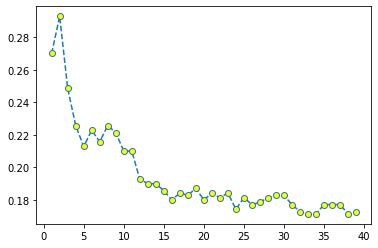

In [ ]:
plt.plot(range(1,40),error_rate,marker='o',linestyle='dashed',markerfacecolor = 'yellow')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [ ]:
# k = 39 has minimum error rate
classifier = KNeighborsClassifier(n_neighbors=34)
classifier.fit(X_train,y_train) #by choosing the minimum K value the accuracy improved from 73 to 83 percent

KNeighborsClassifier(n_neighbors=34)

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_pred,y_test))
# improved precision


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       333
           1       0.85      0.81      0.83       367

    accuracy                           0.83       700
   macro avg       0.83      0.83      0.83       700
weighted avg       0.83      0.83      0.83       700



# Great Job!

In [ ]:
print(confusion_matrix(y_pred,y_test))

[[281  52]
 [ 68 299]]
